In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
# importing other important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Steps we will go through in our whole projects
1. Data Cleaning
2. EDA (Data wrangling also within it)
3. Text preprocessing(vectorization, steming, remove stop words)
4. Model building
5. Evaluation of model
6. Improvement (depend on evaluation)
7. Convert model in website
8. Deployment

# 1 Data Cleaning

- First check what we have inside our three unnamed columns

In [6]:
# check columns unnamed  2,3,4

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


>- We have multiple nan values in our unnamed columns so first we deal with it

In [7]:
# checking nan in unnamed columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
print('unnamed: 2 has null values:', df['Unnamed: 2'].isnull().sum())
print('---------')
print('unnamed: 3 has null values:', df['Unnamed: 3'].isnull().sum())
print('---------')
print('unnamed: 4 has null values:', df['Unnamed: 4'].isnull().sum())

unnamed: 2 has null values: 5522
---------
unnamed: 3 has null values: 5560
---------
unnamed: 4 has null values: 5566


> Observation:
> Hence we have a lot of missing data in our last three column so we decded to remove all the three columns

In [9]:
# dropping last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


> we permanently drop our last three columns

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


>- Next we have to rename our desired column to make it clear

In [12]:
# Renaming the columns
df.rename(columns={'v1':'Msg_Type', 'v2':'Msg'}, inplace=True)

In [13]:
df.head()

,Msg_Type,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- In column Msg_type we have spam and ham category so we will do label encodig

In [14]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
# Applying only on Msg_type

df['Msg_Type'] = encoder.fit_transform(df['Msg_Type'])

In [16]:
df.head()

,Msg_Type,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- Now we have spam = 1 and Ham = 0, thats exactly what we want

In [17]:
# checking missing vaues
df.isnull().sum()

Msg_Type    0
Msg         0
dtype: int64

- We donot have any nan value in the required columns so this step is skipped.

In [18]:
# Checking for duplicate values
df.duplicated().sum()

403

- We have 403 duplicates value in our whole df so we are removing them

In [19]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [20]:
# checking duplicate values
df.duplicated().sum()

0

- here we donot have any duplicate value

In [21]:
df.shape

(5169, 2)

> ### We have done woth Data cleaning part 

# 2. EDA

- When ever we are doing predictive modelling first step is to understand the data properly that can be done by doing Exploratory Data Analysis.
- This is the classification supervised learning problem.

Question we will solve using the data are as follow?
1. Percentage of Spam and Ham SMS.
2. Second step is word Analysis we perform on a data to check 
- number of alphabet, character and sentences are there in the SMS.
- we then create a word cloud.
- Convert in dictionary.

### i. Percentage of HAM and SPAM SMS 

In [22]:
# Percantage of spam and ham sms
df['Msg_Type'].value_counts()

Msg_Type
0    4516
1     653
Name: count, dtype: int64

- we have 4516 ham SMS and 653 Spam SMS. Let visualize it

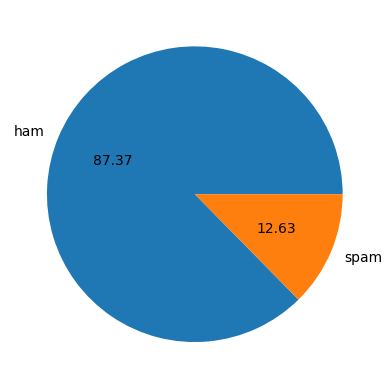

In [23]:
# visualiting percentage of ham and spam msg using pie chart by matplotlib
plt.pie(df['Msg_Type'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f') 
plt.show()
# %0.2f mean we will see only 2 place decimal value of the percentage

- This is the distribution of our data set.
1. We have approximately 87 percent of ham messages
2. Spam are only 13 percent.

- Hence we concluded after observing the distribution of data that **The Data is imbalane**

### ii. Analysis SMS w.r.t Alphabets, Numbers and Sentences
- first we have to import the nltk to do analysis
- Second we will do the feature engineering.



In [24]:
!pip install nltk

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- for deeper analysis we are creating 3 new columns which show us the number of character, number and sentences in our Message column

In [27]:
# checking length of the sms 
df['len-of-sms'] = df['Msg'].apply(len)

In [28]:
df.head()

,Msg_Type,Msg,len-of-sms
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# fetching only number of words in our sms
df['Msg'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Msg, Length: 5169, dtype: object

In [30]:
# getting the lrngth of the words and make a new column
df['words-len'] = df['Msg'].apply(lambda x:len(nltk.word_tokenize(x)))


In [31]:
df.head()

,Msg_Type,Msg,len-of-sms,words-len
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
# Fetching number of sentences
df['Msg'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Msg, Length: 5169, dtype: object

In [33]:
# length of the sentence
df['sent-len'] = df['Msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Msg_Type,Msg,len-of-sms,words-len,sent-len
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


- Hence we created new features using the existing features

In [35]:
# looking into new feature to further analyze
df[['len-of-sms','words-len' , 'sent-len']].describe()

,len-of-sms,words-len,sent-len
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


- Average length of one sms is 79 where as we have on average 18 words in our sms along with on average 2 sentences. 

In [36]:
# lets look into ham and spam columns separately
# Ham sms
df[df['Msg_Type']== 0][['len-of-sms','words-len' , 'sent-len']].describe()


,len-of-sms,words-len,sent-len
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [37]:
#Spam SMS
df[df['Msg_Type']== 1][['len-of-sms','words-len' , 'sent-len']].describe()

,len-of-sms,words-len,sent-len
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


- It shows that the lenght of sms is more in spam as compare to ham

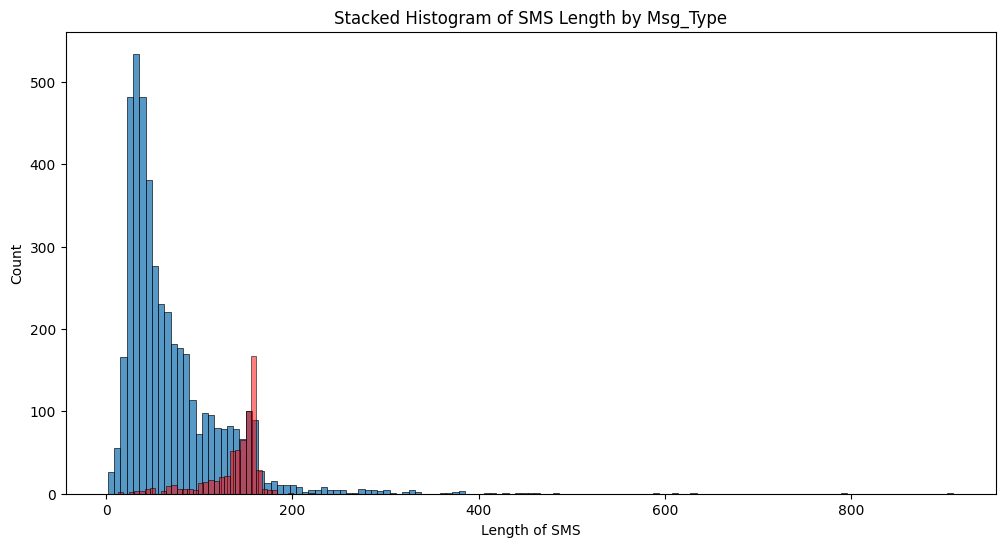

In [38]:
# Visualizing the length of our messages
plt.figure(figsize=(12, 6))

# Filter the data based on 'Msg_Type' and plot the histograms
sns.histplot(df[df['Msg_Type'] == 0]['len-of-sms'])
sns.histplot(df[df['Msg_Type'] == 1]['len-of-sms'], color='red', alpha=0.5)

# Set the labels and title
plt.xlabel('Length of SMS')
plt.ylabel('Count')
plt.title('Stacked Histogram of SMS Length by Msg_Type')

# Show the plot
plt.show()

- Histogram show that mostly ham messages are base on less length of character and mostly spam messages are based on maximum length of character.

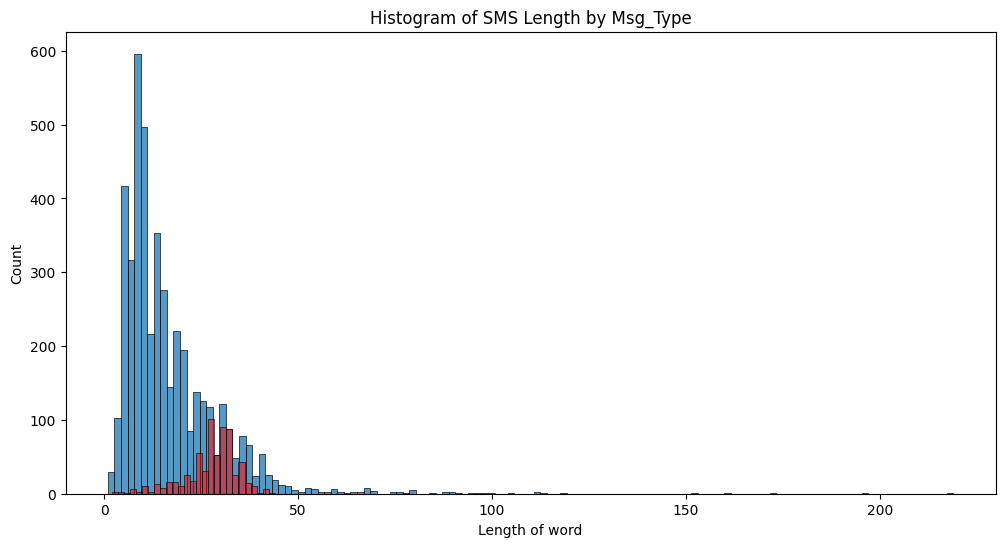

In [39]:
#same for words and sentences
plt.figure(figsize=(12, 6))

# Filter the data based on 'Msg_Type' and plot the histograms
sns.histplot(df[df['Msg_Type'] == 0]['words-len'])
sns.histplot(df[df['Msg_Type'] == 1]['words-len'], color='red', alpha=0.5)

# Set the labels and title
plt.xlabel('Length of word')
plt.ylabel('Count')
plt.title('Histogram of SMS Length by Msg_Type')

# Show the plot
plt.show()


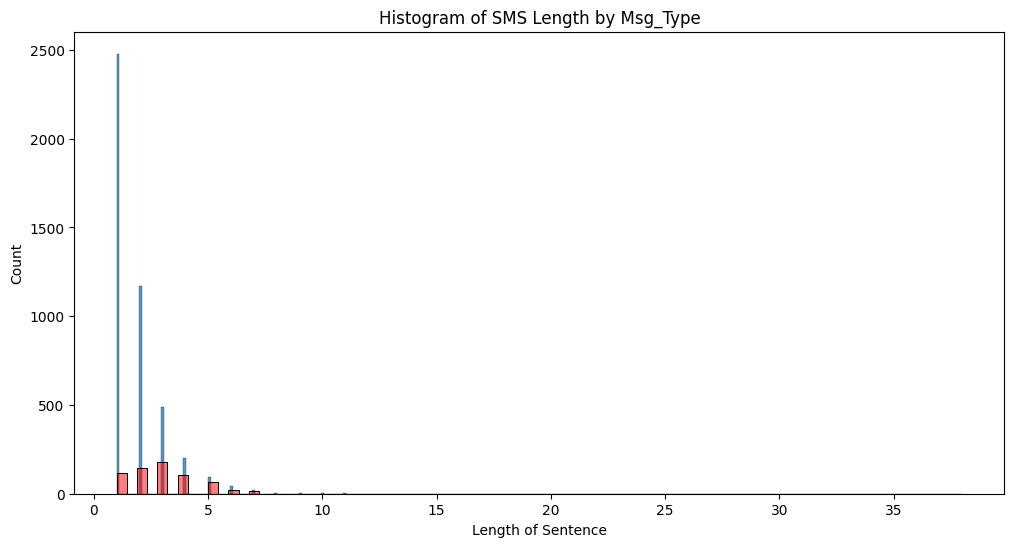

In [40]:
plt.figure(figsize=(12, 6))

# Filter the data based on 'Msg_Type' and plot the histograms
sns.histplot(df[df['Msg_Type'] == 0]['sent-len'])
sns.histplot(df[df['Msg_Type'] == 1]['sent-len'], color='red', alpha=0.5)

# Set the labels and title
plt.xlabel('Length of Sentence')
plt.ylabel('Count')
plt.title('Histogram of SMS Length by Msg_Type')

# Show the plot
plt.show()


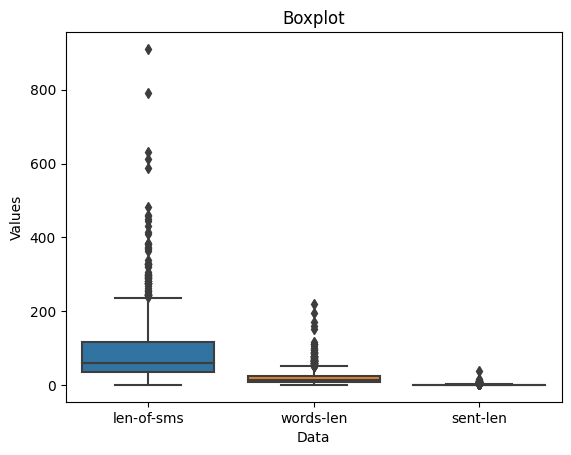

In [41]:
# checking outliers in data
selected_columns = df[['len-of-sms', 'words-len', 'sent-len']]
selected_columns

# Create boxplots using Seaborn
sns.boxplot(data=selected_columns)

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Boxplot')

# Show the plot
plt.show()

- we also have an outliers in our data set that can also effect our analysis.

In [42]:
df.head()

,Msg_Type,Msg,len-of-sms,words-len,sent-len
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

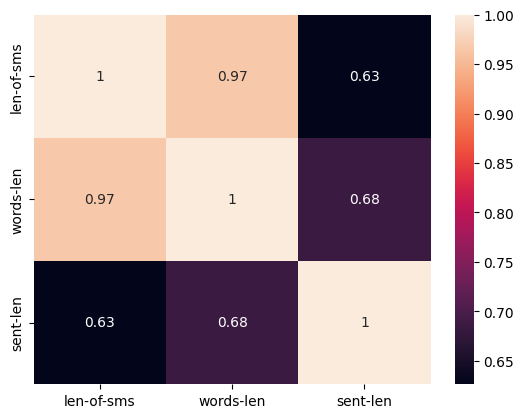

In [43]:
# Let see the correlation between the columns
sns.heatmap(selected_columns.corr(), annot=True)

- length of character is positively correlated and its a greater chance that if we have maximum number of character in our sms then it is close to a spam sms.
- So for building the model we have to take any one feature to predict.

### iii. Data Preprocessing 
- In this step we will do some changing with our data like:
1. Converting data into Lower case.
2. Tokenization ( break down the data into words)
3. Remove some special characters
4. Removing stop words (is, of , for or etc) and punctuation
5. stemming (converting all the words into their root words like going convert into go or etc)

- for this we have to make a function and then apply that function on our msg column

In [44]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [46]:
transform_text('i am here , at 12:00 to have a dinner. Nice to meet you there! love cooking')

'dinner nice meet love cook'

- Function is working properly let apply it on our Msg column

In [47]:
# applying it on our Msg column and add a new column
df['transform_text'] = df['Msg'].apply(transform_text)


In [48]:
df.head()

,Msg_Type,Msg,len-of-sms,words-len,sent-len,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


- Now we are creating the wordcloud for our spam and ham messages

In [49]:
# Creating word cloud for both ham and spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df[df['Msg_Type'] == 1]['transform_text'].str.cat(sep=" "))

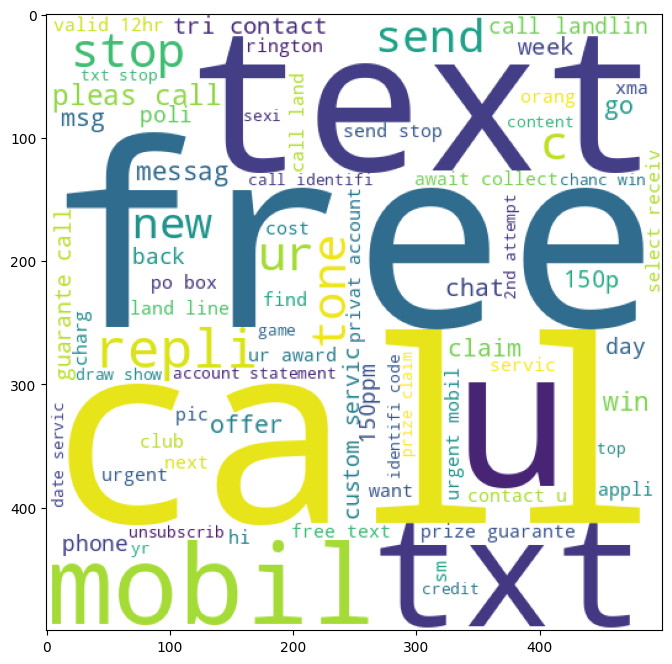

In [51]:

plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

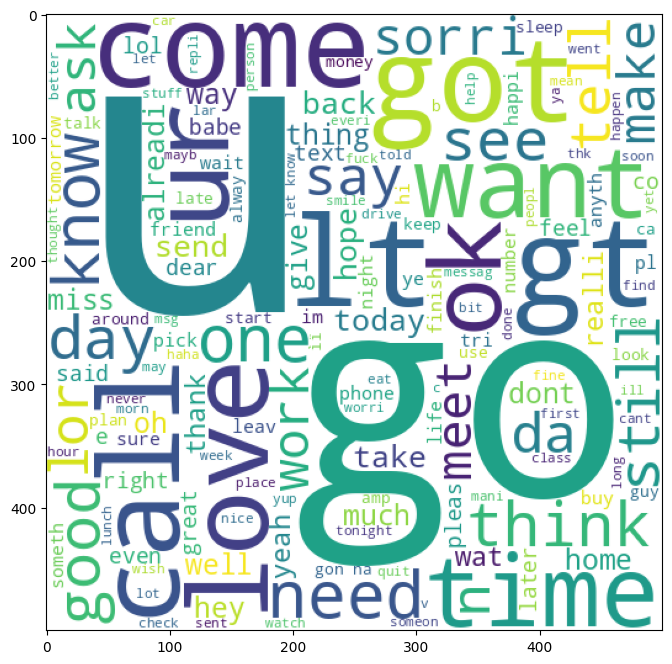

In [52]:
# Creating wordcloud for ham messages
ham_wc = wc.generate(df[df['Msg_Type'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)


In [53]:
# look into top words uses in ham and spam messages
df.head()

,Msg_Type,Msg,len-of-sms,words-len,sent-len,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in df[df['Msg_Type'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
# this is how we convert all our spam messages which is in our transformed column into a list of words, 
# each msg is now become the item of the list



In [55]:
len(spam_corpus)

9883

- this is how we create a cloud word and then create a corpus of that spam messages. In total we have 9883 words in the corpus

- lets create a dictionary from the corpus word 

In [56]:
# converting corpus into dictionary
from collections import Counter
# creating daat frame from dctionary of top 30 words
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [57]:
df1.head()

,0,1
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122


In [58]:
df1.rename(columns={0: 'word' , 1: 'frequency'}, inplace=True)

# Display the DataFrame with the renamed column
print(df1)


       word  frequency
0      call        320
1      free        189
2         2        155
3       txt        141
4      text        122
5         u        119
6        ur        119
7     mobil        114
8      stop        104
9     repli        103
10    claim         98
11    prize         82
12        4         76
13      get         74
14      new         64
15   servic         64
16     tone         63
17     send         60
18   urgent         57
19    nokia         57
20  contact         56
21    award         55
22    phone         52
23     cash         51
24    pleas         50
25     week         49
26      win         48
27        c         45
28  collect         45
29      min         45


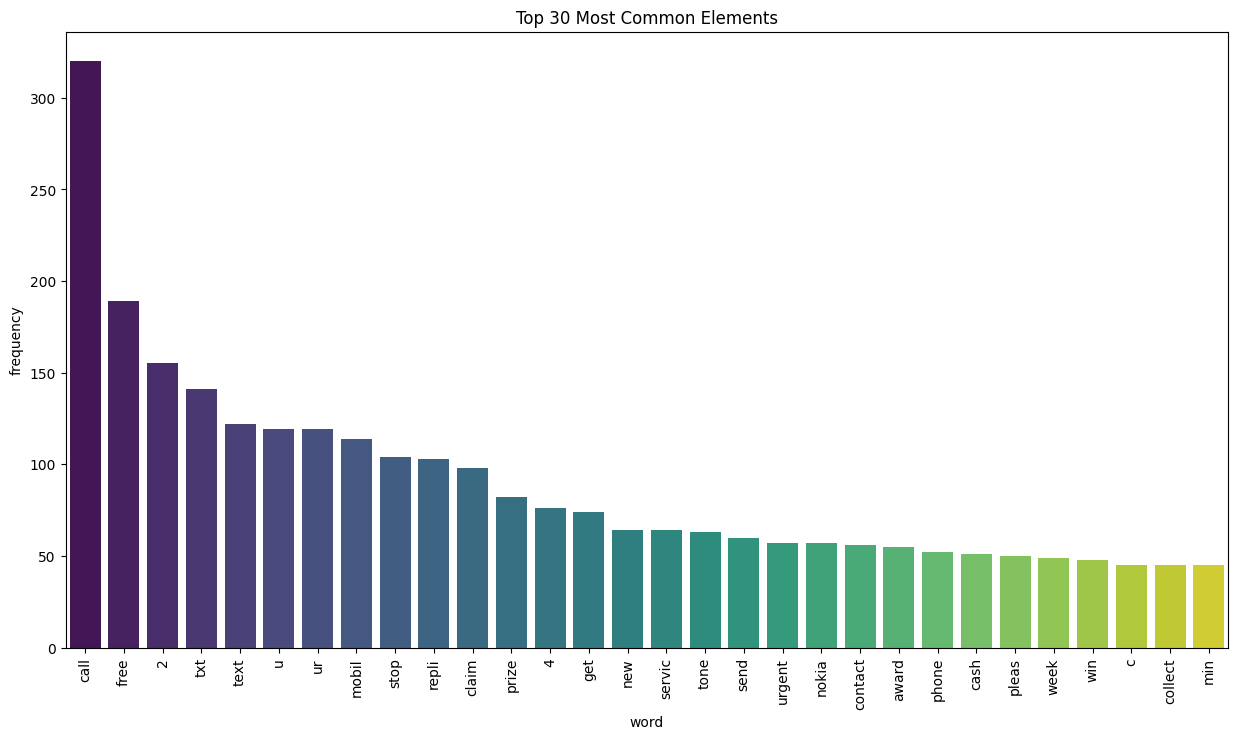

In [59]:
# plotting box plot to visualize the top 30 words in spam dictionary
plt.figure(figsize=(15, 8))
sns.barplot(x = 'word' , y = 'frequency' ,data=df1, palette='viridis')
plt.title('Top 30 Most Common Elements')
plt.xticks(rotation='vertical')
plt.xlabel('word')
plt.ylabel('frequency')
plt.show()

- These are the top 30 wprds in a spam message

- lets do the same process for the ham message

In [60]:
# making ham corpus
ham_corpus = []

for msg in df[df['Msg_Type'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)


34771

In [61]:
# creating data frame
df2 = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [62]:
df2.head()


,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287


In [63]:
# rename our columns
df2.rename(columns={ 0:'word' , 1 : 'frequency'}, inplace= True)
df2.head()

,word,frequency
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287


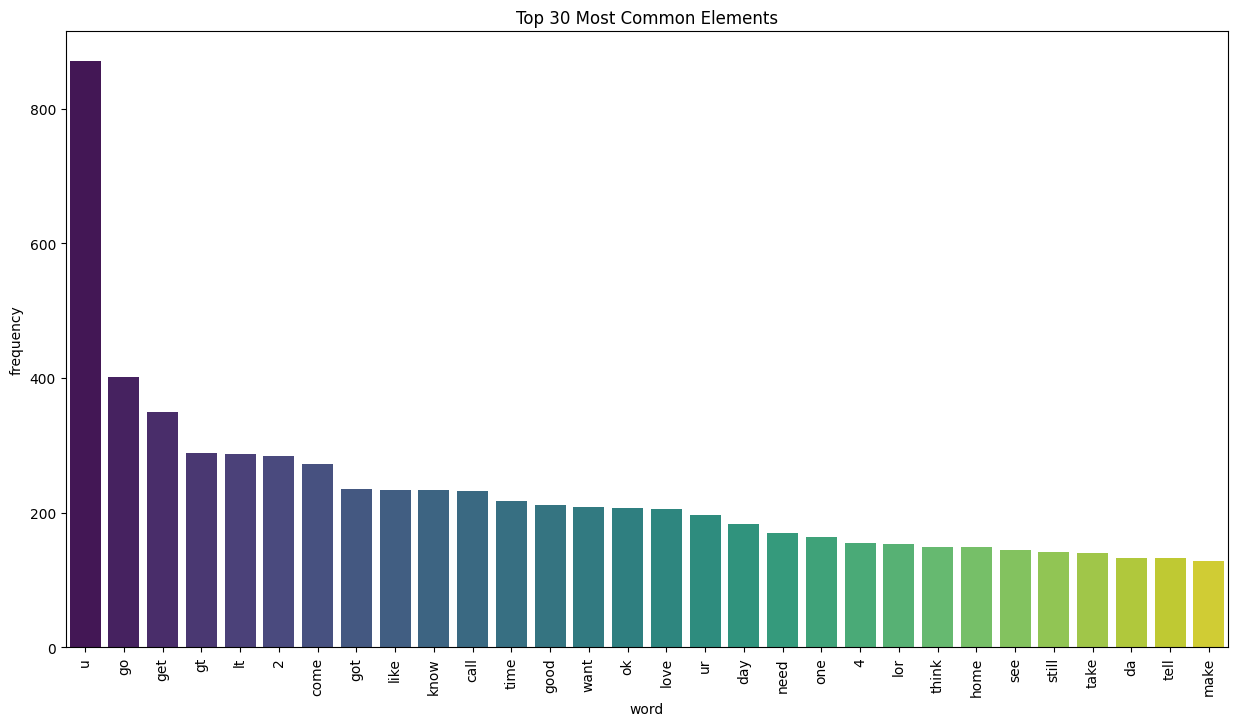

In [64]:
# plotting box plot to visualize the top 30 words in ham dictionary
plt.figure(figsize=(15, 8))
sns.barplot(x = 'word' , y = 'frequency' ,data=df2, palette='viridis')
plt.title('Top 30 Most Common Elements')
plt.xticks(rotation='vertical')
plt.xlabel('word')
plt.ylabel('frequency')
plt.show()

- steps we did from making corpus to visualization
1. create a list of word and store in corpus
2. convert that corpus into a dictionary using counter
3. convert dictionary into a data frame
4. Visualize it using seaborn library 

--------
----------
## EDA completed

# 3. Model Building

In [65]:
df.head()

,Msg_Type,Msg,len-of-sms,words-len,sent-len,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


- In this step we will create a model using Naiive Bayes Algorithm because it is the textual data set and Naiive Bayes is quiet suitable on it


- Before moving towards algorithm we first convert our data into numeric input because Algorithm works with number.
- Our input is Trasnform_text and output is Msg_Type. 
- Input is not in a number type so first we have to convert it in a number or vector. or we will do vectorization.
>Steps of Vectorization
1. Bag of words
2. TF-IDF
3. Word2Vec

- we are using Bag of word to vectorize our data then give an input in our algorithm.

In [66]:
# importing library 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [67]:
# Transforming input column i.e Transform_text into an array
X = cv.fit_transform(df['transform_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
X.shape

(5169, 6629)

- we have 5169 sms having 6629 words

In [69]:
# converting second column into array
y =df['Msg_Type'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
# Creating objects
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print (accuracy_score(y_test,y_pred1))
print (confusion_matrix(y_test, y_pred1))
print (precision_score(y_test, y_pred1))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print (accuracy_score(y_test,y_pred2))
print (confusion_matrix(y_test, y_pred2))
print (precision_score(y_test, y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [75]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print (accuracy_score(y_test,y_pred3))
print (confusion_matrix(y_test, y_pred3))
print (precision_score(y_test, y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


- Hence this is the imbalance data set so we focus mostly on precision score rather than accuracy score

In [76]:
# Using Tfidf vectorization
X = tfidf.fit_transform(df['transform_text']).toarray()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print (accuracy_score(y_test,y_pred1))
print (confusion_matrix(y_test, y_pred1))
print (precision_score(y_test, y_pred1))


0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print (accuracy_score(y_test,y_pred2))
print (confusion_matrix(y_test, y_pred2))
print (precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


- using Tfidf and mnb we get 1.0 precision score that the good one

In [79]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print (accuracy_score(y_test,y_pred3))
print (confusion_matrix(y_test, y_pred3))
print (precision_score(y_test, y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


>- Which model we are going with?\
We are moving ahead with mnb ==>Tfidf

In [80]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))